# Logistic Regression From Scratch

We have a data like as follow:
In the X axis we age and in the y if value is 1 it means a person has a heart diseas and 0 means they don't.

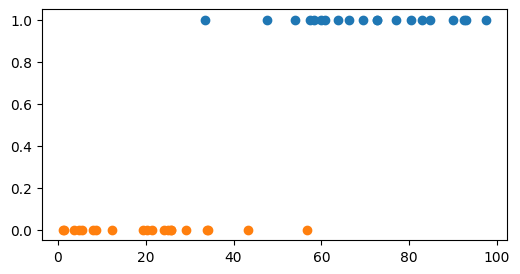

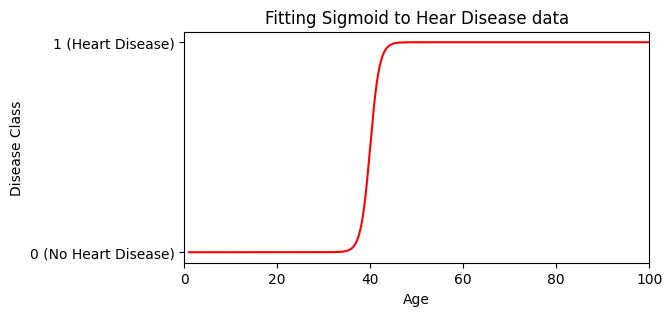

In [129]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
np.random.seed(42)
plt.figure(figsize=(6,3))

def skewed_random_vector(a, b, size, alpha=5, beta=2):
    # Generate a beta distribution
    beta_samples = np.random.beta(alpha, beta, size)
    # Scale the beta distribution to the range [a, b]
    scaled_samples = a + (b - a) * beta_samples
    
    return scaled_samples

# Example usage
a = 1
b = 100
size = 20  # Number of random values
heart_disease_vector = skewed_random_vector(a, b, size, alpha=2, beta=1)
y = np.ones((heart_disease_vector.shape))
plt.scatter(heart_disease_vector,y)
a = 1
b = 100
healty_vector = skewed_random_vector(a, b, size, alpha=1, beta=3)
y = np.zeros((healty_vector.shape))
plt.scatter(healty_vector,y)
plt.show()


plt.figure(figsize=(6,3))
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-(x-40)))

# Generate data points
z = np.linspace(1, 100, 1000)
y = sigmoid(z)
# Plot the sigmoid function
plt.plot(z, y, label = 'Sigmoid Function',c='r')

plt.xlabel('Age')
plt.ylabel('Disease Class')
plt.title('Fitting Sigmoid to Hear Disease data')
plt.xlim(0,100)
plt.yticks([0,1],labels=['0 (No Heart Disease)','1 (Heart Disease)'])
plt.show()


Logistic Regression is used for binay classification

Examples:

- Email is spam or not
- Transaction is fraud or not
- Tumor is malignant or benign

## Logistic Regression Steps

### 2.1. **Data Collection**:

Gather the data that you will use for the logistic regression model. Ensure that your dataset includes the dependent variable (binary outcome) and the independent variables (predictors).


### 2.2. **Split the Data**: 

Divide the dataset into training and testing sets. Typically, an 80-20 or 70-30 split is used.

### 2.3. **Model Training**:

   - **Initialize the Model**: Create an instance of the logistic regression model.
   - **Fit the Model**: Train the model using the training data.

### 2.4. **Model Evaluation**:
   - **Predict on Test Data**: Use the trained model to make predictions on the test set.
   - **Confusion Matrix**: Create a confusion matrix to evaluate the performance of the model.
   - **Performance Metrics**: Calculate metrics such as accuracy, precision, recall, and F1-score.

### 2.5. **Model Tuning**: 

Adjust the model parameters to improve performance. This can include regularization techniques like L1 (Lasso) or L2 (Ridge).


Sigmoid gives us probability

### Logistic Regression Overview
Logistic regression is used for binary classification problems, where the outcome is either 0 or 1. It predicts the probability that a given input belongs to a particular class.

In linear regression we had a linear relation between data input $(x)$ and the continous predicted output $(\hat{y})$

$$
\hat{y} = w^{T}x + b
$$

In logistic regression, we aim to determine the probability that a data point belongs to class (0) or class (1).
We use sigmoid function:

### Sigmoid Function
<!-- The logistic regression model uses the sigmoid function to map any real-valued number into a value between 0 and 1. Before maping
 -->
The logistic regression model uses the sigmoid function to map any real-valued number into a brobability between 0 and 1.

$$
\sigma(\hat{y}) = \frac{1}{1 + e^{-(\hat{y})}} = \frac{1}{1 + e^{-(w^{T}x + b)}}
$$



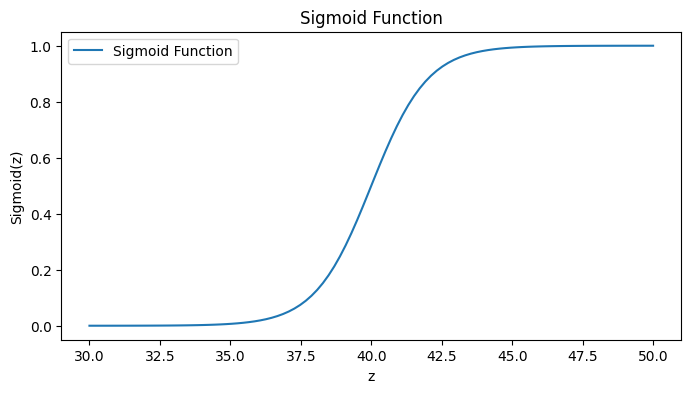

In [25]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-(x-40)))

# Generate data points
z = np.linspace(30, 50, 100)
y = sigmoid(z)

plt.figure(figsize=(8,4))
# Plot the sigmoid function
plt.plot(z, y, label = 'Sigmoid Function')

plt.legend()
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.title('Sigmoid Function')
plt.show()



### How to find the best w and b?

To find best w and b, we need a cost function to minimize iterativaly.



### Cost Function (Cross Entropy)
The cost function for logistic regression is designed to penalize incorrect predictions. It is defined as:

$$
J(\hat{y}) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_{(i)} \log(\hat{y}_{(i)}) + (1 - y_{(i)}) \log(1 - \hat{y}_{(i)}) \right]
$$

$$
\text{when } (y_{(i)}=1) => J = -\log(\hat{y}_{(i)})
$$

$$
\text{when } (y_{(i)}=0) => J = -\log(1 - \hat{y}_{(i)})
$$


<!-- 
$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

$$
h_\theta(x) = \hat{y} = \sigma(w^{T}x + b)
$$ -->




where:
- $ m $ is the number of training examples.
- $ ( y^{(i)} ) $ is the actual label for the $( i )$-th training example.
- $ h_\theta(x^{(i)}) $ is the predicted probability for the $( i )$-th training example.

### Why this Cost function works well?
- **When $(y^{(i)}=1)$**: The cost function simplifies to $(-\log(y_{\text{pred}}^{(i)}))$. If the predicted probability $y_{\text{pred}}^{(i)}$ is close to 1, the cost is low. If $y_{\text{pred}}^{(i)}$ is close to 0, the cost is high.
- **When $(y^{(i)}=0)$**: The cost function simplifies to $(-\log(1 - y_{\text{pred}}^{(i)}))$. If the predicted probability $y_{\text{pred}}^{(i)}$ is close to 0, the cost is low. If $y_{\text{pred}}^{(i)}$ is close to 1, the cost is high.

We can ckeck this explaination in the follwoing figure:


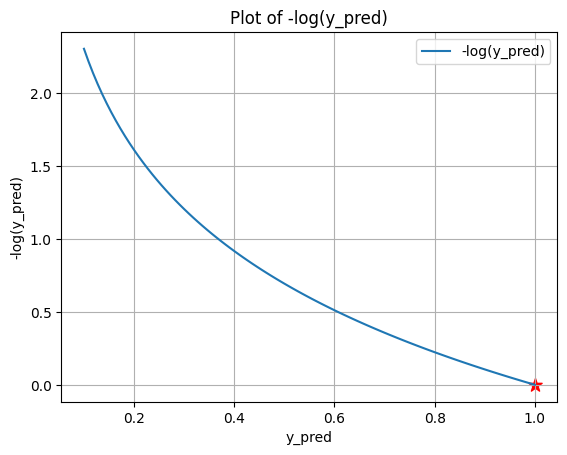

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values from 0.1 to 10 (logarithm of 0 is undefined)
y_pred = np.linspace(0.1, 1, 100)
# Compute -log(x)
y = -np.log(y_pred)

# Create the plot
plt.plot(y_pred, y, label='-log(y_pred)')
y_pred = [1]
plt.scatter(y_pred,-np.log(y_pred), marker='*', s=100, c='r')
plt.xlabel('y_pred')
plt.ylabel('-log(y_pred)')
plt.title('Plot of -log(y_pred)')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# import matplotlib.pyplot as plt
# data = [
#         ]
# x = [i[0] for i in data]
# y = [i[1] for i in data]
# plt.scatter(x,y, marker='*')

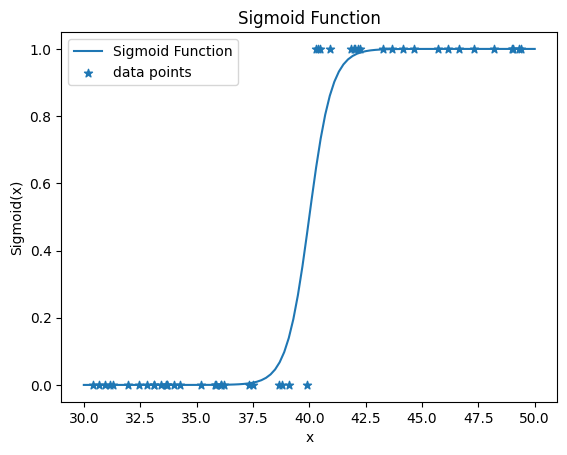

In [28]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-(2*(x-40))))

# Generate data points
x = np.linspace(30, 50, 100)
y = sigmoid(x)

# Plot the sigmoid function
plt.plot(x, y, label = 'Sigmoid Function')

x = np.random.uniform(30, 50, 50)
y = [1 if sigmoid(i)>0.5 else 0 for i in x]
plt.scatter(x, y, marker='*', label = 'data points')
plt.legend()
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Sigmoid Function')
# plt.grid(True)
plt.show()


Resources: 
- https://www.youtube.com/watch?v=yIYKR4sgzI8
- https://www.youtube.com/watch?v=YYEJ_GUguHw&list=PLcWfeUsAys2k_xub3mHks85sBHZvg24Jd&index=4